# Exploratory Data Analysis (EDA)

*Disclaimer: The information provided in this analysis of AAPL, GOOG, AMZN, and MSFT financial data is for educational purposes only and should not be considered as financial advice. The results and insights presented may not accurately reflect future performance, and investing in these stocks involves significant risk. It is strongly recommended to consult with a qualified financial advisor before making any investment decisions.*

### Download Stock Price Data

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# List of stocks
tickers = ['AAPL', 'GOOG', 'AMZN', 'MSFT']

# Define a color for each stock
colors = {'AAPL': 'blue', 'GOOG': 'green', 'AMZN': 'orange', 'MSFT': 'red'}

# Download historical stock price data
stock_data = yf.download(tickers, start="2020-01-01", end="2024-01-01", group_by='ticker')

[*********************100%***********************]  4 of 4 completed


### Data Cleaning

In [ ]:
# Example: Fill missing values with the forward fill method
stock_data = stock_data.fillna(method='ffill')


<ipython-input-2-b9666785dde3>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data = stock_data.fillna(method='ffill')


### Data Visualization

####  Plotting Adjusted Close Prices

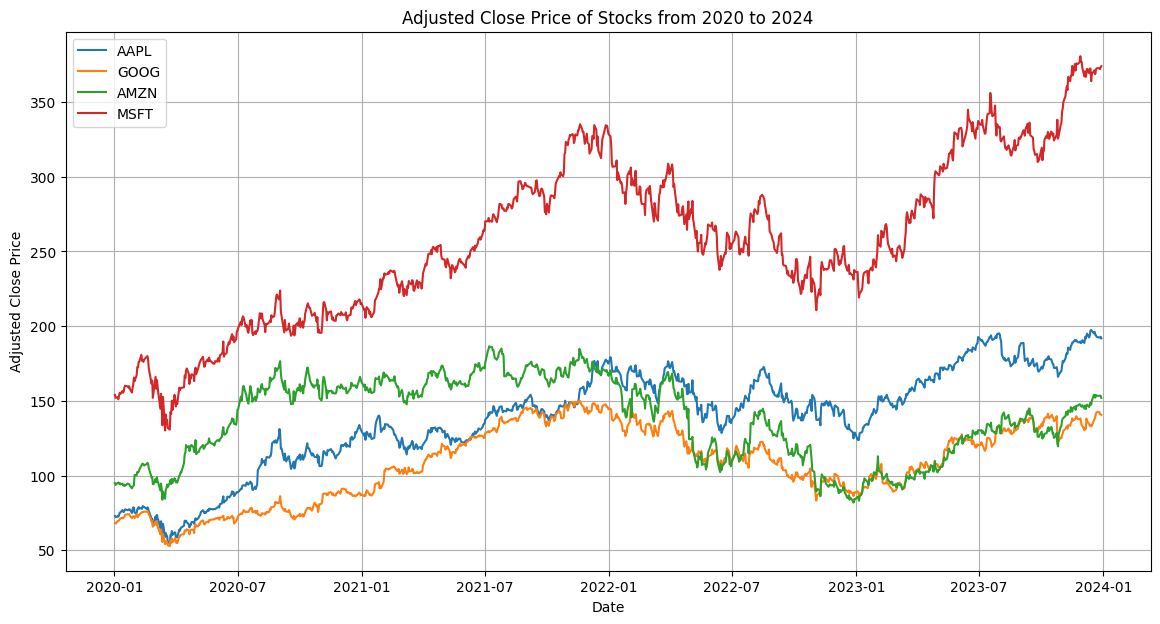

In [ ]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(stock_data[ticker]['Adj Close'], label=ticker)

plt.title('Adjusted Close Price of Stocks from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid()
plt.show()


This graph shows how the value of four major tech companies - Apple, Google, Amazon, and Microsoft - has changed over the past few years. As you can see, all of them have grown significantly. Microsoft has seen the biggest increase in value, while Amazon's price has been a bit more up and down. Overall, this graph demonstrates the strong growth and performance of these companies in recent years.

#### Correlation Matrix

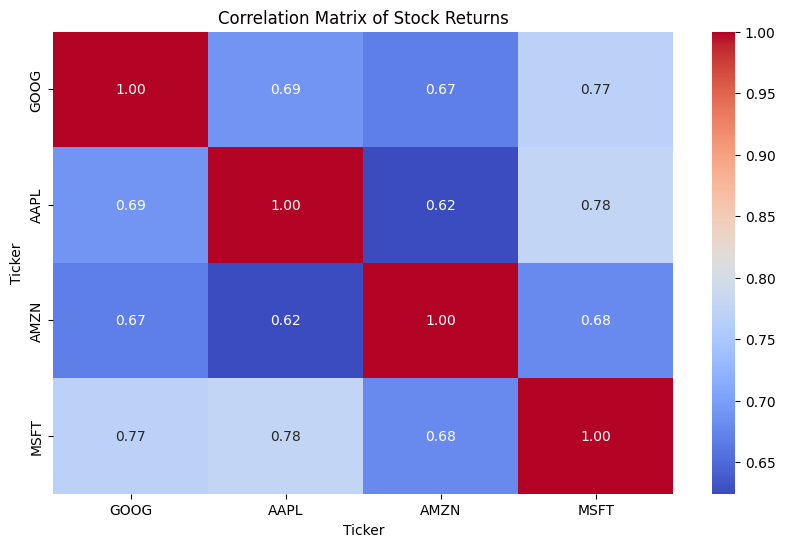

In [ ]:
# Calculate returns
returns = stock_data.xs('Adj Close', level=1, axis=1).pct_change()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Stock Returns')
plt.show()


The correlation matrix shows that there is a strong positive correlation between the stock prices of Apple (AAPL), Amazon (AMZN), Google (GOOG), and Microsoft (MSFT). This means that when the price of one stock goes up, the prices of the others tend to go up as well. The highest correlation is between GOOG and MSFT, followed by AAPL and GOOG.

#### Basic System Analysis

In [ ]:
# Summary statistics of returns
print(returns.describe())

# Calculate and display annualized returns and volatility
annualized_returns = returns.mean() * 252  # Assuming 252 trading days in a year
annualized_volatility = returns.std() * np.sqrt(252)

summary = pd.DataFrame({
    'Annualized Return': annualized_returns,
    'Annualized Volatility': annualized_volatility
})

print(summary)


Ticker         GOOG         AAPL         AMZN         MSFT
count   1005.000000  1005.000000  1005.000000  1005.000000
mean       0.000942     0.001187     0.000750     0.001095
std        0.021080     0.021146     0.023741     0.020546
min       -0.111008    -0.128647    -0.140494    -0.147390
25%       -0.009662    -0.009127    -0.012159    -0.009447
50%        0.001321     0.000988     0.000782     0.000978
75%        0.011519     0.012743     0.013327     0.012024
max        0.094017     0.119808     0.135359     0.142169
        Annualized Return  Annualized Volatility
Ticker                                          
GOOG             0.237471               0.334641
AAPL             0.299015               0.335681
AMZN             0.188953               0.376880
MSFT             0.275846               0.326155


The descriptive statistics table shows the summary of the daily stock returns for Apple (AAPL), Amazon (AMZN), Google (GOOG), and Microsoft (MSFT). The table includes the count of observations, mean, standard deviation, minimum, maximum, and quartiles of the returns.

The annualized return for each stock is calculated by multiplying the mean daily return by 252 (the number of trading days in a year). The annualized volatility is calculated by multiplying the standard deviation of daily returns by the square root of 252.

Based on the table, the stock with the highest annualized return is Apple (AAPL) at 29.90%, followed by Microsoft (MSFT) at 27.58% and Google (GOOG) at 23.75%. However, Amazon (AMZN) has the highest annualized volatility at 37.69%, indicating that it is the most volatile stock.

Overall, the table shows that all four stocks have experienced positive returns over the period analyzed, but they also exhibit different levels of risk and volatility.








